House Price Prediction (regression model) [more data more accuracy]


house price data --> data preprocessing --> data analysis --> train/test split -->  XGBoost regressor --> evaluation.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt     #used for visualization
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

importing the dataset

In [5]:
house_price_dataset = pd.read_csv('/content/BostonHousing.csv')

In [6]:
house_price_dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
house_price_dataset.shape

(506, 14)

In [8]:
house_price_dataset.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
house_price_dataset.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
price      0
dtype: int64

understanding the correlation between various features in the data set.

1. positive correlation (one feature increses other feature also increses)
2. negative correlation (one feature decreses other feature also decreses)

In [10]:
correlation = house_price_dataset.corr()

<Axes: >

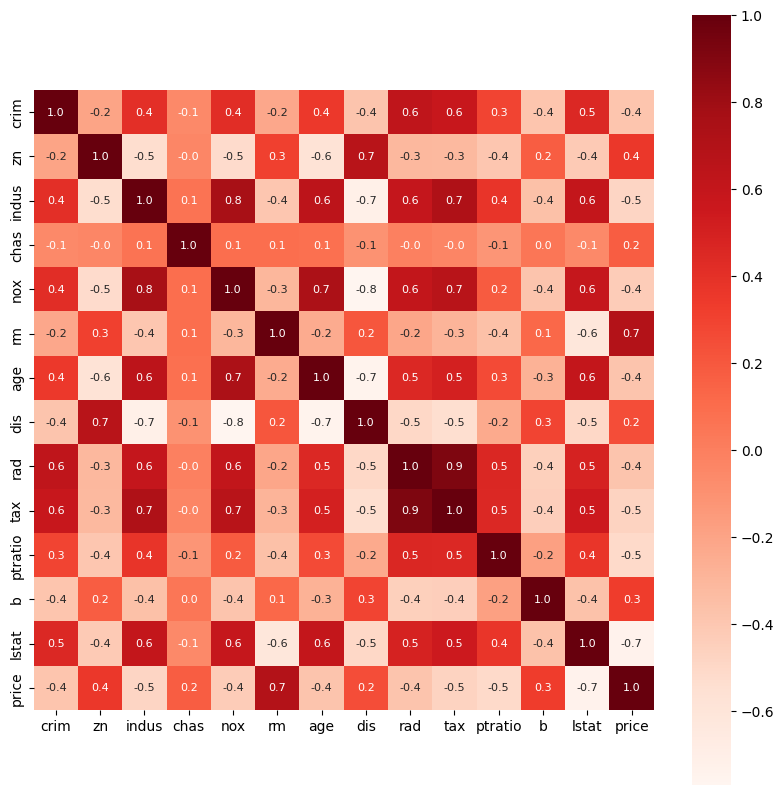

In [16]:
#to find the correlation among the features we have to make a heat map   (metplotlib,seaborn)


plt.figure(figsize =(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt= '.1f', annot=True, annot_kws={'size':8}, cmap='Reds')


In [18]:
#splitting the data

X = house_price_dataset.drop(['price'],axis=1)
Y = house_price_dataset['price']

In [19]:
print(X)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio       b  lstat
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3  396.90   4.98
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8  396.90   9.14
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8  392.83   4.03
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7  394.63   2.94
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7  396.90   5.33
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...      ...     ...    ...
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273     21.0  391.99   9.67
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273     21.0  396.90   9.08
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273     21.0  396.90   5.64
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889 

In [20]:
print(Y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64


In [33]:
#splitting the data into training and testing

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=1)

In [34]:
print(X.shape,X_train.shape,X_test.shape)

(506, 13) (404, 13) (102, 13)


Model Training

In [35]:
#load the model

In [36]:
model = XGBRegressor()

In [37]:
#training the model
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

evluation and prediction on training data

In [38]:
training_data_prediction = model.predict(X_train)  #accuracy for prediction on training data

In [39]:
print(training_data_prediction)

[25.287899  23.304115   7.203543  21.18787   11.712369  27.001377
 29.601633  26.501963  43.502502  23.609913  10.997985  33.40193
 35.998486  36.395298  19.011835  20.196331  34.899765  49.998886
 19.298422  14.8881445 26.610622  19.905317  24.798319  21.198807
 23.907646  20.584316  23.090736  27.999428  19.994778  23.093884
 25.001348   9.686624  23.905449  36.100372  13.402416  12.723068
 39.79885   10.400233  20.598919  17.77934   19.504488  23.694613
 28.506124  24.299711  23.786673  19.092104  28.388767  20.490433
 33.81244   14.507689  20.388994  16.001871  13.30335   30.790573
 27.492449  24.405096  24.39801   25.141434  43.815685  21.899052
 26.19648   14.208478  20.789291  20.100916  23.098286  13.083362
 16.18796   24.807959  20.201899  22.47833   14.804074  28.702394
 20.099424  23.400444  31.995035  19.11702   49.986347  20.898264
 21.688086  22.005064  17.201548  30.302023  12.282589  21.394003
 20.502174  35.20127   19.59359   22.004604  21.695543  14.104271
 21.090494 

In [45]:
# R square error  (to check the accuracy of the predicted value with the actual value) [more value more accuracy]
# this will find the varience among the predicted and actual value

score_1 = metrics.r2_score(Y_train,training_data_prediction)


# mean absolute error (mean difference of both the actual and predicted values)

score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)


print('R squared error : ', score_1)   #between 0-1
print('Mean Absolute error : ', score_2)   #if value around 5 or  10 then model is bad

R squared error :  0.9999985384297829
Mean Absolute error :  0.007549762017656112


visulization of the difference in the actual value and the predicted value with the graph of training dataset

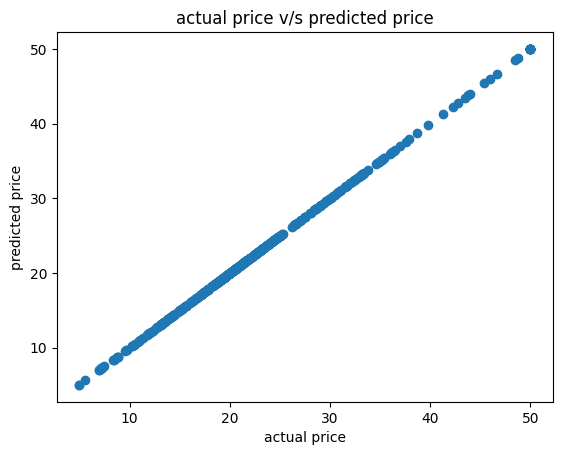

In [46]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('actual price v/s predicted price')
plt.show()

In [47]:
test_data_prediction = model.predict(X_test)


score_1 = metrics.r2_score(Y_test,test_data_prediction)
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)


print('R squared error : ', score_1)   #between 0-1
print('Mean Absolute error : ', score_2)

R squared error :  0.9027718655671774
Mean Absolute error :  2.2952071479722562


In [48]:

input_data=(0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94)

#chaning the input data into a numpy array.

input_data_as_array = np.asarray(input_data)

#reshape the np array as we are predicting for one instant

input_data_reshape = input_data_as_array.reshape(1,-1)


prediction = model.predict(input_data_reshape)
print(prediction)

[33.40212]
